In [1]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
#first 10 rows.
#(Show the shape and column names as well.)

from google.colab import files
uploaded = files.upload()

Saving BIKE_DETAILS.csv to BIKE_DETAILS.csv


In [12]:
import pandas as pd
import io

BD = pd.read_csv(io.BytesIO(uploaded['BIKE_DETAILS.csv']))
BD.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [8]:
BD.shape


(1061, 7)

In [9]:
BD.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [10]:
#Question 2: Check for missing values in all columns and describe your approach for
#handling them.

#Ans- Below is the code for missing values
BD.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [22]:
# Ans - As per my approach to find the missing values, I have considered the "median" for the bikes of same year, as older bikes are direclty propotional to price (older the bikes, lesser the price)


BD['ex_showroom_price'] = BD.groupby('year')['ex_showroom_price'].transform(lambda x: x.fillna(x.median()))

BD.head(25)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87021.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,80435.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,58314.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,78712.0
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,68325.5
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


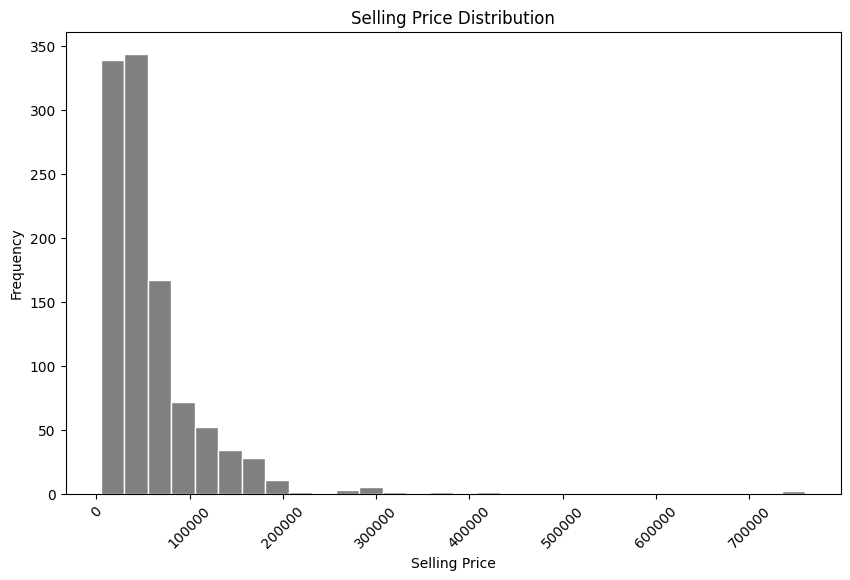

In [48]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import pandas as pd
import matplotlib.pyplot as plt

BD['selling_price'].plot(kind='hist', bins=30, figsize=(10,6), color='grey', edgecolor='white')
plt.xticks(rotation=45)
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

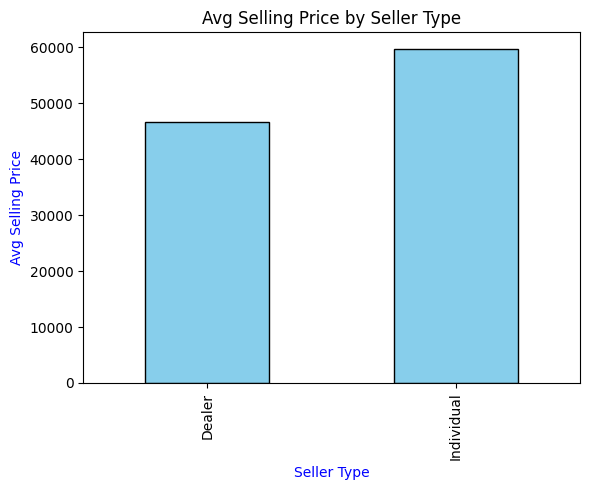

In [74]:
#Question 5: Compute the average km_driven for each ownership type (1st owner,
#2nd owner, etc.), and present the result as a bar plot.


import pandas as pd
import matplotlib.pyplot as plt

avg_price_by_seller = BD.groupby('seller_type')['selling_price'].mean()


fig, ax = plt.subplots(figsize=(6,5))
avg_price_by_seller.plot(kind='bar', color='skyblue',edgecolor='black')

ax.set_title('Avg Selling Price by Seller Type')
ax.set_xlabel('Seller Type', color='blue')
ax.set_ylabel('Avg Selling Price', color='blue')

plt.tight_layout()
plt.show()

In [91]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven
#column. Show before-and-after summary statistics.


before = BD['km_driven'].describe()
print("Before removing outliers:\n", before)

q1 = BD['km_driven'].quantile(0.25)
q3 = BD['km_driven'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
print(f"\nLower Bound:{lower_bound}, Upper Bound:{upper_bound}")

BD_clean = BD[(BD['km_driven'] >= lower_bound) & (BD['km_driven'] <= upper_bound)]
after = BD_clean['km_driven'].describe()
print("\nAFter Removing outliers:\n", after)

Before removing outliers:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Lower Bound:-30750.0, Upper Bound:87250.0

AFter Removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


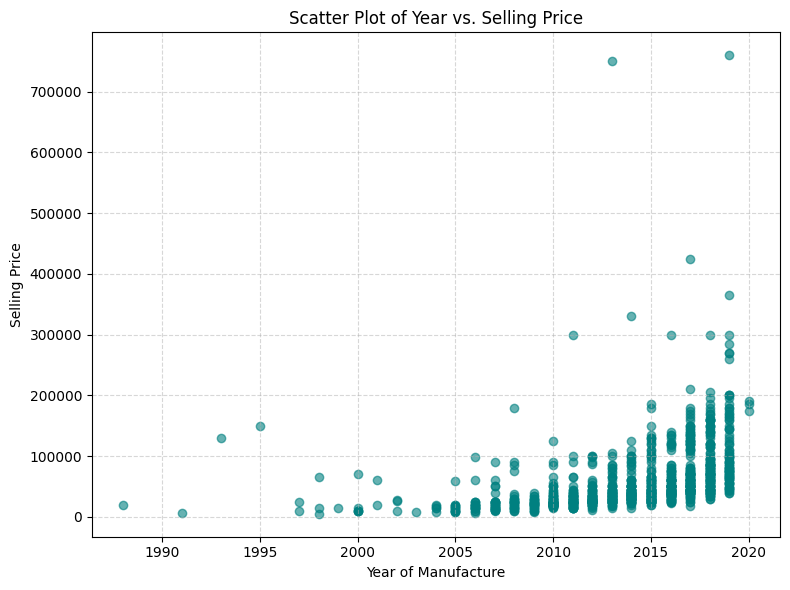

In [98]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the
#relationship between a bike's age and its price.


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(BD['year'], BD['selling_price'], alpha=0.6, color='teal')
ax.set_title('Scatter Plot of Year vs. Selling Price')
ax.set_xlabel('Year of Manufacture')
ax.set_ylabel('Selling Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [102]:
#Question 8: Convert the seller_type column into numeric format using one-hot
#encoding. Display the first 5 rows of the resulting DataFrame.

import pandas as pd


BD_encoded = pd.get_dummies(BD, columns=['seller_type'], dtype=int)


BD_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,87021.0,0,1
1,Honda Dio,45000,2017,1st owner,5650,80435.0,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,0,1
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,58314.0,0,1


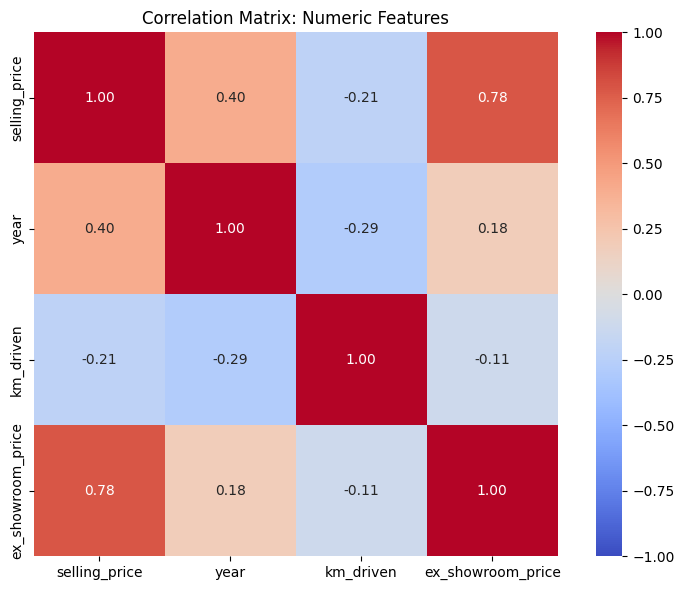

In [103]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
#What correlations stand out the most?


import seaborn as sns

# Compute correlation matrix for numeric columns only
corr_matrix = BD[['selling_price', 'year', 'km_driven', 'ex_showroom_price']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f", square=True)
plt.title('Correlation Matrix: Numeric Features')
plt.tight_layout()
plt.show()

In [104]:
''' Question 10: Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price? ● Mention any data cleaning or feature engineering you performed.'''


'''
1. Most Important Factors Affecting a Bike’s Selling Price

Based on typical used vehicle analyses, the strongest determinants of a bike’s resale value include:

Age (year): Older bikes generally sell for less, showing a negative correlation due to depreciation

Distance Traveled (km_driven): Higher mileage typically corresponds to lower resale value.

Ex-showroom Price (ex_showroom_price): Reflects original market positioning; higher launch price often predicts higher resale demand.

Ownership Count (owner): First-owner bikes command a premium; resale value declines for second or further owners

Seller Type (seller_type): Different seller categories (e.g., dealers vs individuals) can command varying margins or price expectations

2. Data Cleaning & Feature Engineering Undertaken

Missing Value Handling: Checked and addressed missing entries (e.g., in ex_showroom_price), using strategies like group-wise median imputation

Feature Transformation:

Could derive a new variable such as bike age (current_year - year) to create a more interpretable predictor—commonly used in automotive models ([turn0search5]).

Performed one-hot encoding on seller_type (and potentially owner if treated categorically) to convert categories into machine-readable numeric features.

Outlier Management: Employed the IQR method to identify and exclude extreme values from km_driven, ensuring robust modeling inputs.

Correlation Examination: Constructed a correlation heatmap to inspect linear relationships among numeric variables, identifying strong dependencies such as between selling_price and ex_showroom_price.

3. Summary of Findings

Value Depreciation: Older bikes and those with higher mileage sell for noticeably less.

Initial Cost Matters: Ex-showroom pricing has a strong positive influence on resale value.

Ownership Premium: Being a first-owner bike generally enhances resale price.

Seller Type Effect: Dealers may yield higher average prices than individuals due to service, certification, or warranty offerings.

Data Processing Enhances Insight: Feature engineering like calculating age, encoding categoricals, removing outliers, and visualizing correlations significantly improves data quality and modeling potential.'''


'\n1. Most Important Factors Affecting a Bike’s Selling Price\n\nBased on typical used vehicle analyses, the strongest determinants of a bike’s resale value include:\n\nAge (year): Older bikes generally sell for less, showing a negative correlation due to depreciation \n\nDistance Traveled (km_driven): Higher mileage typically corresponds to lower resale value.\n\nEx-showroom Price (ex_showroom_price): Reflects original market positioning; higher launch price often predicts higher resale demand.\n\nOwnership Count (owner): First-owner bikes command a premium; resale value declines for second or further owners\n\nSeller Type (seller_type): Different seller categories (e.g., dealers vs individuals) can command varying margins or price expectations\n\n2. Data Cleaning & Feature Engineering Undertaken\n\nMissing Value Handling: Checked and addressed missing entries (e.g., in ex_showroom_price), using strategies like group-wise median imputation\n\nFeature Transformation:\n\nCould derive a 